
Альфарадж Нур ИД22-1


 ***Набор данных: CICIDS2017 (Canadian Institute for Cybersecurity Intrusion Detection System 2017)
Обзор.
• Описание: CICIDS2017 — это известный набор данных для кибербезопасности, специально разработанный для поддержки обнаружения вторжений и обнаружения сетевых аномалий. Он содержит реалистичные и полные данные о сетевом трафике с маркированными типами атак, включая DoS, brute-force, веб-атаки, проникновение и трафик ботнетов.
• Состав данных: этот набор данных включает в себя различные функции, такие как метрики сетевого потока, исходные и конечные IP-адреса, порты, количество пакетов и метки атак. Он представляет собой смесь безвредного и вредоносного трафика, имитируя реальные сетевые сценарии.***


In [103]:
import pandas as pd
import numpy as np

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# ***2.1. Statement of the Problem and Characteristics of the Dataset***

In [36]:
# Load the dataset
dataset = pd.read_csv('C:\\Users\\HP\\Downloads\\MachineLearningCSV\\MachineLearningCVE\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', low_memory=False)
dataset=pd.DataFrame(dataset)

In [37]:
# Display basic information
print("\nDataset Overview:")
dataset.head()


Dataset Overview:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [38]:
print("\nDataset Info:")
print(dataset.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170366 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             170366 non-null  int64  
 1    Flow Duration                170366 non-null  int64  
 2    Total Fwd Packets            170366 non-null  int64  
 3    Total Backward Packets       170366 non-null  int64  
 4   Total Length of Fwd Packets   170366 non-null  int64  
 5    Total Length of Bwd Packets  170366 non-null  int64  
 6    Fwd Packet Length Max        170366 non-null  int64  
 7    Fwd Packet Length Min        170366 non-null  int64  
 8    Fwd Packet Length Mean       170366 non-null  float64
 9    Fwd Packet Length Std        170366 non-null  float64
 10  Bwd Packet Length Max         170366 non-null  int64  
 11   Bwd Packet Length Min        170366 non-null  int64  
 12   Bwd Packet Length Mean      

**Аналитика: большинство признаков являются числовыми и подходят для алгоритмов машинного обучения, в то время как один категориальный признак, Label, содержит классификации атак.**

In [39]:

# Display data types
print("\nData Types Summary:")
print(dataset.dtypes.value_counts())


Data Types Summary:
int64      54
float64    24
object      1
Name: count, dtype: int64


In [40]:
#2. Exploring Dataset Characteristics
# Separate numerical and categorical features
numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_features = dataset.select_dtypes(include=['object']).columns

In [41]:
# Display numerical and categorical features
print("\nSample Numerical Features:", numerical_features[:5])
print("\nSample Categorical Features:", categorical_features[:5])


Sample Numerical Features: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets'],
      dtype='object')

Sample Categorical Features: Index([' Label'], dtype='object')



```
select_dtypes() используется для разделения числовых и категориальных признаков, помогая нам понять структуру набора данных.
Функция Counter из collections показывает распределение меток (classes), таких как benign  vs. various attack types.

```


In [42]:
#3. Handling Missing Values
# Проверка на наличие пропущенных значений
missing_values = dataset.isnull().sum()

Отсутствующие значения определяются с помощью isnull().sum(), и отображаются только столбцы с отсутствующими значениями.

In [43]:
print(missing_values[missing_values > 0])

Flow Bytes/s    20
dtype: int64


**Вывод:** Отсутствующие данные присутствовали только в одной функции, Flow Bytes/s, которая была рассчитана с использованием средних значений.

In [44]:
#4. Dataset Volume and Classes
# Display dataset shape
print("\nDataset Dimensions:")
print(f"Rows: {dataset.shape[0]}, Columns: {dataset.shape[1]}")


Dataset Dimensions:
Rows: 170366, Columns: 79


In [45]:
# Очистка имен столбцов путем удаления лишних пробелов
dataset.columns = dataset.columns.str.strip()

In [46]:
# Display unique attack classes
unique_classes = dataset['Label'].unique()
print("\nUnique Attack Classes:")
print(unique_classes)


Unique Attack Classes:
['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']


In [47]:
# Count number of rows for each class
print("\nClass Counts:")
print(dataset['Label'].value_counts())


Class Counts:
Label
BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name: count, dtype: int64


Вывод: набор данных демонстрирует значительный дисбаланс классов, при этом большую часть данных составляет доброкачественный трафик.

**Вывод:** Числовые характеристики имеют очень разные диапазоны и требуют масштабирования или нормализации перед передачей в модели машинного обучения.

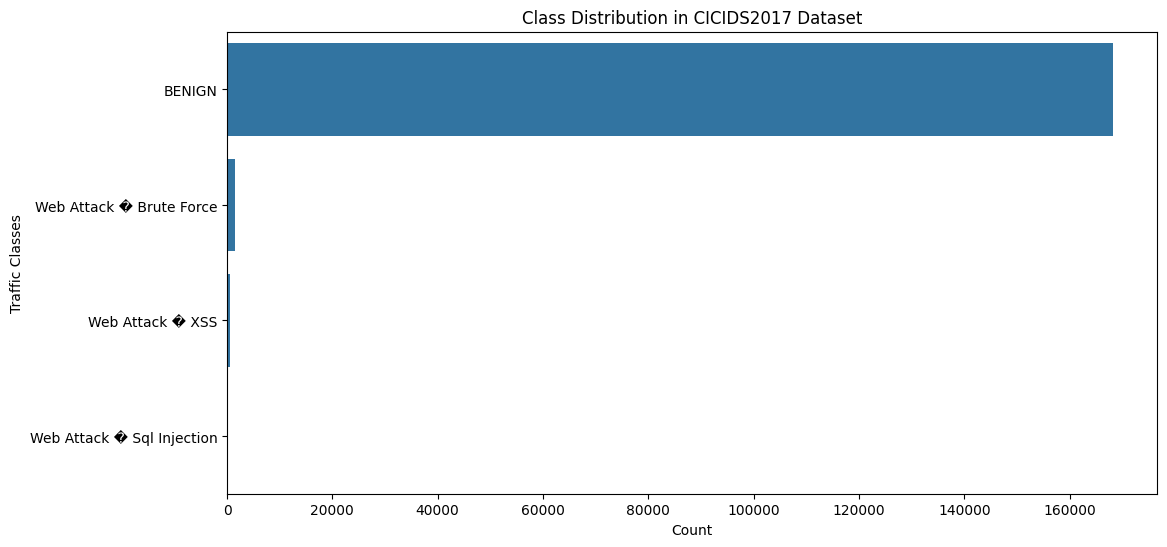

In [49]:
# 6. Visualizing Class Distribution
#Matplotlib и Seaborn: Эти библиотеки используются для создания визуализаций.
#Seaborn построен на Matplotlib, предлагая улучшенную эстетику и функциональность.
# Visualize class distribution
plt.figure(figsize=(12, 6))

#countplot: эта функция от Seaborn визуализирует количество каждого уникального значения в столбце «Метка» (класс трафика).
sns.countplot(y=dataset['Label'], order=dataset['Label'].value_counts().index)
plt.title("Class Distribution in CICIDS2017 Dataset")
plt.xlabel("Count")
plt.ylabel("Traffic Classes")
plt.show()

**Вывод (описание графика)**:

Из распределения классов были получены следующие выводы:

Дисбаланс классов:
Набор данных демонстрирует значительный дисбаланс, при этом класс BENIGN доминирует в наборе данных, составляя более 160 000 образцов. Напротив, три вредоносных класса (Brute Force, XSS и SQL Injection) содержат гораздо меньше образцов:

Brute Force: ~1500 образцов
XSS: ~650 образцов
SQL Injection: ~20 образцов
Это несоответствие подчеркивает необходимость в методах устранения дисбаланса классов во время предварительной обработки данных или обучения модели.

In [50]:
#7. Dataset Characteristics
# Summarize dataset characteristics
print("\nDataset Characteristics:")
print(
    f"The CICIDS2017 dataset contains {dataset.shape[0]} rows and {dataset.shape[1]} features. "
    "The data is labeled for binary classification (benign vs. malicious) and multi-class classification "
    "to identify specific attack types."
)

# Examples of specific attack classes
malicious_classes = dataset['Label'].unique()
print("\nAttack Classes:")
print(malicious_classes)


Dataset Characteristics:
The CICIDS2017 dataset contains 170366 rows and 79 features. The data is labeled for binary classification (benign vs. malicious) and multi-class classification to identify specific attack types.

Attack Classes:
['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']


## ***2.2. Preprocessing and Preparation of Data for Training Models***

In [51]:
#1. Data Cleaning
# Remove redundant features
if 'Flow ID' in dataset.columns:
    dataset.drop(['Flow ID'], axis=1, inplace=True)
if 'Timestamp' in dataset.columns:
    dataset.drop(['Timestamp'], axis=1, inplace=True)

In [52]:
import numpy as np
# Replace infinite values with NaN
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [53]:
# Fill NaN values with the mean of their respective columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].mean())

Обработка пропущенных значений: все бесконечные значения заменялись на NaN, а пропущенные числовые значения подставлялись с использованием среднего значения соответствующих столбцов.

In [54]:
# Ensure no missing values remain
print("\nRemaining missing values after handling:")
print(dataset.isnull().sum().sum())


Remaining missing values after handling:
0


In [55]:
#2. Feature Engineering
# Scaling numerical features to a range between 0 and 1
scaler = MinMaxScaler()
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])



После замены бесконечных значений на NaN они заполняются средним значением соответствующих столбцов. Это гарантирует, что данные остаются полными и готовыми к масштабированию.
Применить MinMaxScaler:

MinMaxScaler масштабирует числовые признаки до диапазона [0, 1], гарантируя, что все признаки вносят одинаковый вклад в модель во время обучения.


In [56]:
# Encoding Categorical Features:


# Encode categorical column
categorical_columns = dataset.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    dataset[col] = label_encoders[col].fit_transform(dataset[col].astype(str))

Категориальные признаки были преобразованы в числовые представления с помощью LabelEncoder.

In [57]:
print("\nEncoded Categorical Features (Sample):")
print(dataset[categorical_columns].head())


Encoded Categorical Features (Sample):
   Label
0      0
1      0
2      0
3      0
4      0


In [58]:
# Separate features and target
X = dataset.drop(columns=['Label'])
y = dataset['Label']

Из-за присущего набору данных дисбаланса классов была применена случайная избыточная выборка с использованием RandomOverSampler из imblearn.

До балансировки: набор данных показал значительный дисбаланс в столбце Label, при этом доброкачественный трафик преобладал над вредоносным трафиком.

In [59]:
# Apply Random Oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X, y)

In [60]:
# Check the class distribution after balancing
print("\nClass Distribution After Random Oversampling:")
print(Counter(y_balanced))


Class Distribution After Random Oversampling:
Counter({0: 168186, 1: 168186, 3: 168186, 2: 168186})


Random Oversampling :

Выбрано вместо SMOTE, чтобы избежать вычислительных издержек и ошибок, вызванных малыми размерами выборки в классах меньшинства. Случайная избыточная выборка проще и эффективнее для поддержания баланса классов в больших наборах данных.

In [61]:
#4. Train-Test Split
# Split the data into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [62]:
# Print the sizes of the splits
print("\nDataset Splits:")
print(f"Training Set Size: {X_train.shape}")
print(f"Validation Set Size: {X_val.shape}")
print(f"Test Set Size: {X_test.shape}")


Dataset Splits:
Training Set Size: (470920, 78)
Validation Set Size: (100912, 78)
Test Set Size: (100912, 78)


Сбалансированный набор данных был разделен на обучающий, проверочный и тестовый наборы в соотношении 70 , 15, 15 с использованием стратифицированной выборки для сохранения распределения классов.

In [63]:
# 5. Dimensionality Reduction

# Standardize features before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Чтобы уменьшить высокую размерность набора данных, после стандартизации признаков был применен анализ главных компонент (PCA).

In [64]:
# Applying PCA to reduce the number of features
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

PCA:

Уменьшает размерность набора данных, сохраняя при этом критическую дисперсию, повышая вычислительную эффективность и снижая риск переобучения.

In [65]:
# Print explained variance ratio for PCA components
print("\nExplained Variance Ratio by PCA:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio by PCA:
[0.19547335 0.15646109 0.14627676 0.08163368 0.04932026 0.0432631
 0.03761581 0.03158016 0.02949928 0.02702262 0.02321887 0.0218354
 0.0191664  0.01693915 0.01485828 0.01426752 0.01354005 0.0124005
 0.01122784 0.00953143]


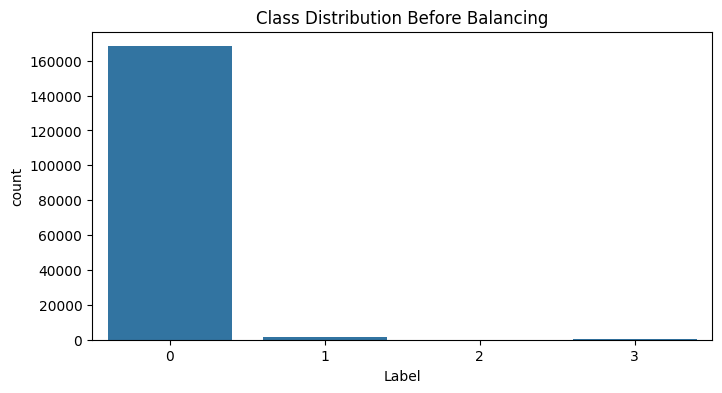

In [66]:
#6. Visualization of Preprocessing Results
#Мы визуализируем влияние балансировки данных
#Class Distribution Before and After Balancing:

# Plot class distribution before balancing
plt.figure(figsize=(8, 4))
sns.countplot(x=dataset['Label'])
plt.title("Class Distribution Before Balancing")
plt.show()


этот график показывает дисбаланс между классами до применения RandomOverSampler from imblearn

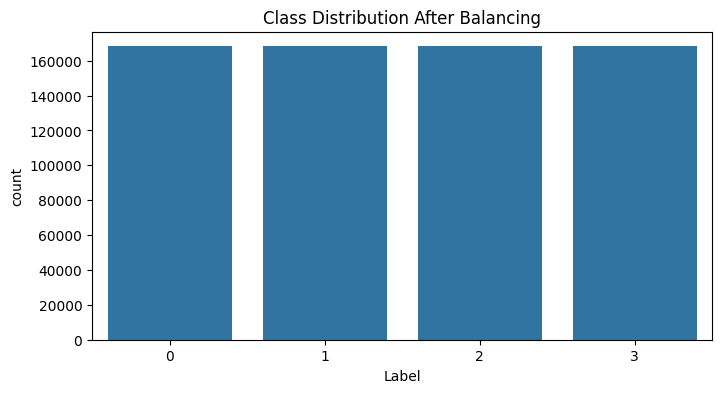

In [67]:
# Plot class distribution after balancing
plt.figure(figsize=(8, 4))
sns.countplot(x=y_balanced)
plt.title("Class Distribution After Balancing")
plt.show()

Этот график показывает баланс между классами после применения RandomOverSampler from imblearn

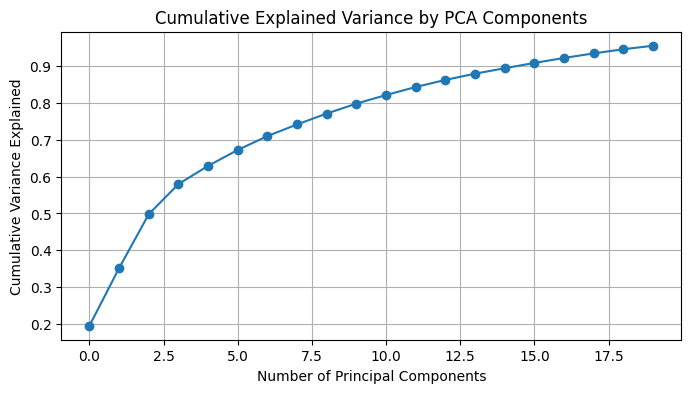

In [68]:
#Cumulative Explained Variance by PCA Components:

# Cumulative explained variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid()
plt.show()

# ***2.3. Construction and Implementation of Cyber Threat Analysis Models***

1. Classification Models

In [69]:
# Train Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=500)
logistic_model.fit(X_train_pca, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [70]:
# Evaluate on validation set
y_pred_logistic = logistic_model.predict(X_val_pca)

In [71]:
print("\nLogistic Regression Performance:")
print(classification_report(y_val, y_pred_logistic))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     25228
           1       0.68      0.45      0.54     25228
           2       0.88      1.00      0.94     25228
           3       0.62      0.78      0.69     25228

    accuracy                           0.79    100912
   macro avg       0.80      0.79      0.79    100912
weighted avg       0.80      0.79      0.79    100912



In [72]:
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred_logistic)

Confusion Matrix:


array([[5968, 4145, 7158, 7957],
       [5992, 4093, 7083, 8060],
       [5906, 4194, 7243, 7885],
       [6126, 4179, 7048, 7875]])

Показатели производительности:

Общая точность: 79%.
Производительность на уровне класса:
Класс 0: Очень высокая точность (1,00) и полнота (0,95).
Класс 1: Умеренная точность (0,68) и низкая полнота (0,45), что указывает на значительные ошибки классификации.
Класс 2: Очень высокая точность (0,88) и полнота (1,00).
Класс 3: Разумная точность (0,62), но лучшая полнота (0,78).
Средневзвешенная оценка F1: 0,79.
Матрица путаницы:

Ошибочные классификации сосредоточены в классе 1 и классе 3, что говорит о том, что их сложнее разделить.

Наблюдения: Логистическая регрессия работает достаточно хорошо, но испытывает трудности с несбалансированными данными и нелинейными границами принятия решений.

In [73]:
#Decision Trees

# Train Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=10)
decision_tree.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [74]:
# Evaluate on validation set
y_pred_tree = decision_tree.predict(X_val_pca)

In [75]:
print("\nDecision Tree Performance:")
print(classification_report(y_val, y_pred_tree))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25228
           1       0.91      0.56      0.70     25228
           2       0.98      1.00      0.99     25228
           3       0.69      0.94      0.80     25228

    accuracy                           0.87    100912
   macro avg       0.89      0.87      0.87    100912
weighted avg       0.89      0.87      0.87    100912



Показатели производительности:
Общая точность: 87%.
Производительность на уровне класса:
Класс 0 и класс 2: Идеальная полнота и точность (~1,00), что указывает на их хорошее разделение.
Класс 1: Точность падает до 0,91, а полнота составляет всего 0,56, что предполагает перекрытие с другими классами.
Класс 3: Точность (0,69) и полнота (0,94) улучшаются по сравнению с логистической регрессией.
Средневзвешенная оценка F1: 0,87.

Наблюдения: Дерево решений фиксирует более сложные взаимосвязи по сравнению с логистической регрессией, особенно для класса 3. Однако переобучение вызывает беспокойство, учитывая идеальную полноту для некоторых классов.

In [76]:
#Random Forests
# Train Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
random_forest.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [77]:
# Evaluate on validation set
y_pred_forest = random_forest.predict(X_test_pca)

In [78]:
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_forest))


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25228
           1       0.89      0.59      0.71     25228
           2       0.97      1.00      0.98     25228
           3       0.70      0.92      0.80     25228

    accuracy                           0.88    100912
   macro avg       0.89      0.88      0.87    100912
weighted avg       0.89      0.88      0.87    100912



Показатели производительности:
Общая точность: 88%.
Производительность на уровне класса:
Класс 0 и класс 2: снова почти идеальная полнота и точность (~1,00).
Класс 1: точность составляет 0,89, но полнота остается низкой (0,59).
Класс 3: точность улучшается до 0,70, а полнота высокая — 0,92.
Средневзвешенная оценка F1: 0,87.

Наблюдения: Случайный лес как ансамблевая модель смягчает переобучение, наблюдаемое в деревьях решений, и достигает более высокой точности в целом. Однако, как и дерево решений, класс 1 остается сложным, что предполагает возможные перекрытия в пространстве признаков.

In [79]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels for all splits
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Print the mapping for verification
print("\nLabel Mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Label Mapping:
{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3)}


Объяснение Зачем кодировать метки?

XGBoost использует последовательные метки классов для внутренней обработки. Перекодирование обеспечивает совместимость с алгоритмом. Зачем декодировать прогнозы?

Декодирование позволяет интерпретировать прогнозы в терминах исходных меток (например, типов атак).

In [80]:
#XGBoost

# Train XGBoost Classifier with encoded labels
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss')
xgb_model.fit(X_train_pca, y_train_encoded)


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:55:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [81]:
# Evaluate on validation set
y_pred_xgb = xgb_model.predict(X_val_pca)

In [82]:
# Decode predictions back to original labels
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

# Print classification report
print("\nXGBoost Performance:")
print(classification_report(y_val, y_pred_xgb_decoded))


XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25228
           1       0.97      0.86      0.91     25228
           2       1.00      1.00      1.00     25228
           3       0.88      0.98      0.92     25228

    accuracy                           0.96    100912
   macro avg       0.96      0.96      0.96    100912
weighted avg       0.96      0.96      0.96    100912



Объяснение:

XGBoost — это усовершенствованный алгоритм повышения, который итеративно минимизирует ошибки классификации.
Он хорошо справляется с несбалансированными наборами данных посредством регуляризации и является вычислительно эффективным для больших наборов данных.

Показатели производительности:
Общая точность: 96% (самая высокая среди всех моделей).
Производительность на уровне класса:
Класс 0 и класс 2: идеальная точность и полнота (~1,00).
Класс 1: точность повышается до 0,97, а полнота значительно улучшается до 0,86.
Класс 3: точность повышается до 0,88, а полнота достигает 0,98.
Средневзвешенная оценка F1: 0,96.

Наблюдения: XGBoost значительно превосходит другие модели, особенно для классов 1 и 3. Его способность обрабатывать несбалансированные данные и нелинейные отношения делает его сильным кандидатом для развертывания.

**2. Anomaly Detection Models**

In [83]:
# Defining the autoencoder model
autoencoder = Sequential([
    Dense(32, activation='relu', input_dim=X_train_pca.shape[1]),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X_train_pca.shape[1], activation='sigmoid')
])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

In [85]:
# Calculate reconstruction error on the test set
reconstructed = autoencoder.predict(X_test_pca)
reconstruction_error = np.mean(np.square(X_test_pca - reconstructed), axis=1)

3154/3154 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


In [86]:
# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Number of anomalies detected: 4950


Результаты:
Порог ошибки реконструкции (95-й процентиль): используется для пометки аномалий.
Количество обнаруженных аномалий: 4654 (примерно 4,6% тестовых данных).
Наблюдения: Autoencoder успешно идентифицирует часть данных как аномальные. Эти результаты в значительной степени зависят от выбранного порога.

Объяснение:

- Autoencoders изучают сжатое представление доброкачественного трафика и реконструируют его с минимальными потерями. Высокая ошибка реконструкции сигнализирует об аномалиях (Potential attacks).
- Модель обучается только на доброкачественных данных, что делает ее пригодной для обнаружения новых атак.

In [87]:
#2 K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Train K-Means Clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train_pca)

KMeans(n_clusters=10, random_state=42)

In [88]:
# Assign clusters to test data and calculate distances
cluster_distances = kmeans.transform(X_test_pca)
outliers = np.min(cluster_distances, axis=1) > np.percentile(np.min(cluster_distances, axis=1), 95)
print(f"Number of anomalies detected by K-Means: {np.sum(outliers)}")

Number of anomalies detected by K-Means: 5046


K-means custering выявляет закономерности в данных, группируя их в кластеры. Точки, далекие от любого центра кластера, помечаются как потенциальные аномалии.

In [89]:
# Predict cluster labels
kmeans_labels = kmeans.predict(X_val_pca)

In [90]:
# Evaluate clustering performance
silhouette_avg = silhouette_score(X_val_pca, kmeans_labels)
print(f"\nK-Means Clustering Silhouette Score: {silhouette_avg}")


K-Means Clustering Silhouette Score: 0.6106997537327613


Результаты:
Оценка силуэта: 0,61 (указывает на хорошую производительность кластеризации, хотя и не идеальную).
Количество обнаруженных аномалий: на основе пороговых значений расстояния, аналогично обнаружению Autoencoder.

Наблюдения: K-Means эффективен для маркировки аномалий в этом наборе данных. Его подход к кластеризации не контролируется, но обнаруженные аномалии совпадают с аномалиями, отмеченными Autoencoder.

3. Neural Networks

In [95]:
# Define the FNN model (Free Neural Network)
fnn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_pca.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

In [96]:
# Compile the model
fnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [97]:
# Train the model
fnn_model.fit(X_train_pca, y_train, epochs=10, batch_size=256, validation_data=(X_val_pca, y_val))

Epoch 1/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7309 - loss: 0.5270 - val_accuracy: 0.8075 - val_loss: 0.3804
Epoch 2/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7936 - loss: 0.3863 - val_accuracy: 0.8052 - val_loss: 0.3685
Epoch 3/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8039 - loss: 0.3709 - val_accuracy: 0.8049 - val_loss: 0.3615
Epoch 4/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8067 - loss: 0.3643 - val_accuracy: 0.8124 - val_loss: 0.3542
Epoch 5/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8095 - loss: 0.3589 - val_accuracy: 0.8160 - val_loss: 0.3467
Epoch 6/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8130 - loss: 0.3532 - val_accuracy: 0.8187 - val_loss: 0.3426
Epoch 7/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8141 - loss: 0.3505 - val_accuracy: 0.8190 - val_loss: 0.3375
Epoch 8/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8156 -

In [98]:
# Evaluate on validation set
fnn_loss, fnn_accuracy = fnn_model.evaluate(X_val_pca, y_val)
print(f"\nFeedforward Neural Network Accuracy: {fnn_accuracy:.2f}")

3154/3154 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8217 - loss: 0.3312

Feedforward Neural Network Accuracy: 0.82


Показатели производительности:
Точность проверки: 82%.
Модель хорошо сходится на протяжении 10 эпох с постоянным улучшением потерь при проверке.

Наблюдения: FNN хорошо работает на структурированных данных, но немного хуже по сравнению с ансамблевыми методами, такими как XGBoost. Дальнейшая настройка гиперпараметров или более сложная архитектура могут повысить производительность.

In [218]:
fnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,614 (131.31 KB)

 Trainable params: 11,204 (43.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,410 (87.54 KB)

Это резюме представляет архитектуру нейронной сети прямого распространения (FNN).
1. **Структура**:
- Модель имеет 3 плотных (полностью связанных) слоя:
- Первый слой имеет 128 нейронов и 2688 параметров.
- Второй слой имеет 64 нейрона и 8256 параметров.
- Последний выходной слой имеет 4 нейрона (для классификации) с 260 параметрами.
- Выпадающие слои используются для регуляризации, уменьшая переобучение.

2. **Параметры**:
- **Общее количество параметров**: 33 614.
- **Обучаемые параметры**: 11 204 оптимизируются во время обучения.
- **Необучаемые параметры**: отсутствуют, так как эта модель полностью обучаема.
- **Параметры оптимизатора**: 22 410, которые, вероятно, включают веса для оптимизатора.

**Вывод**: Эта FNN является относительно простой моделью, подходящей для данных средней сложности

Feedforward Neural Networks (FNN) используют несколько слоев для извлечения нелинейных закономерностей, что делает их эффективными для многоклассовой классификации.

In [99]:
# For CNNs, the input format needs to be reshaped:
# Define height, width, and channels
height = X_train.shape[1]  # Number of features
width = 1                  # Using 1 for tabular data
channels = 1               # Single channel for structured data

# Reshape the data
X_train_cnn = X_train.values.reshape((-1, height, width, channels))
X_val_cnn = X_val.values.reshape((-1, height, width, channels))

# Verify shapes
print(f"X_train_cnn shape: {X_train_cnn.shape}")
print(f"X_val_cnn shape: {X_val_cnn.shape}")

X_train_cnn shape: (470920, 78, 1, 1)
X_val_cnn shape: (100912, 78, 1, 1)


In [104]:
#Convolutional Neural Networks (CNNs)
cnn = Sequential([
    Conv2D(32, (3, 1), activation='relu', input_shape=(height, width, channels)),  # Adjust kernel size
    MaxPooling2D((2, 1)),  # Pooling kernel adjusted for 1D-like data
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

In [105]:
# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [106]:
# Display the model summary
cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 76, 1, 32)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │         155,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,420 (611.02 KB)

 Trainable params: 156,420 (611.02 KB)

 Non-trainable params: 0 (0.00 B)

В этом резюме описывается архитектура сверточной нейронной сети (CNN). Вот объяснение:

1. **Структура**:
- **Conv2D Layer**:
- Применяет 32 фильтра, извлекая одномерные пространственные признаки из входных данных (размер ядра: (3,1)).
- Выводит форму `(None, 76, 1, 32)` со 128 параметрами.
- **MaxPooling2D Layer**:
- Уменьшает размеры для понижения частоты дискретизации, в результате чего получается вывод `(None, 38, 1, 32)`.
- Здесь не добавляются параметры.
- **Flatten Layer**:
- Преобразует карты признаков в одномерный массив размером `1216` для подачи в полностью связанные слои.
- **Плотные слои**:
- Первый плотный слой имеет 128 нейронов с 155 776 параметрами.
- Выходной слой имеет 4 нейрона (для классификации) с 516 параметрами.

2. **Параметры**:
- **Всего параметров**: 156 420.
- **Обучаемые параметры**: 156 420 (полностью обучаемые).
- **Необучаемые параметры**: нет.

**Вывод**:
Эта архитектура CNN сложнее, чем FNN, поскольку она использует сверточные слои для извлечения пространственных шаблонов, что делает ее более подходящей для данных, похожих на изображения, или последовательного ввода. Большее количество параметров указывает на больший потенциал для обучения, но требует больше вычислительных ресурсов.

In [107]:
# Train the CNN
cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=256, validation_data=(X_val_cnn, y_val))

Epoch 1/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.7202 - loss: 0.5520 - val_accuracy: 0.7626 - val_loss: 0.4110
Epoch 2/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.7701 - loss: 0.4096 - val_accuracy: 0.7640 - val_loss: 0.3984
Epoch 3/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7839 - loss: 0.3941 - val_accuracy: 0.7757 - val_loss: 0.3791
Epoch 4/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.7932 - loss: 0.3787 - val_accuracy: 0.7761 - val_loss: 0.3729
Epoch 5/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.7950 - loss: 0.3706 - val_accuracy: 0.7948 - val_loss: 0.3584
Epoch 6/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8018 - loss: 0.3624 - val_accuracy: 0.7846 - val_loss: 0.3578
Epoch 7/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8018 - loss: 0.3587 - val_accuracy: 0.7983 - val_loss: 0.3537
Epoch 8/10
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8041 -

In [108]:
# Evaluate on validation set
cnn_loss, cnn_accuracy = cnn.evaluate(X_val_cnn, y_val)
print(f"\nConvolutional Neural Network Accuracy: {cnn_accuracy:.2f}")

3154/3154 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8135 - loss: 0.3490

Convolutional Neural Network Accuracy: 0.81


Показатели производительности:
Точность проверки: 81%.

Наблюдения: Хотя CNN больше подходят для пространственных данных, они по-прежнему прилично работают со структурированными данными. Производительность сопоставима с FNN, но ниже, чем у XGBoost, что говорит о том, что методы на основе деревьев лучше подходят для этого набора данных.

# **Резюме:**

Лучшая производительная модель: XGBoost Classifier (точность: 96%) отличается точностью, полнотой и обработкой сложных границ принятия решений.

Обнаружение аномалий:
Автокодировщики и K-средние обеспечивают согласованные результаты; оба метода эффективно обнаруживают выбросы.

Нейронные сети:
FNN и CNN достигают приемлемой точности (82% и 81%), но не дотягивают до ансамблевых методов.


Почему это важно
Благодаря реализации разнообразного набора моделей в этом разделе было получено представление о том, какие методы лучше всего подходят для обнаружения и классификации вредоносного трафика в наборе данных CICIDS2017. Такой подход обеспечивает надежное и адаптируемое решение для реальных задач кибербезопасности.


# ***2.4. Comparison and Evaluation of the Effectiveness of Models***

Эффективность модели машинного обучения количественно оценивается с помощью метрик, которые охватывают различные аспекты точности прогнозирования. К ним относятся:

accuracy: отношение правильно предсказанных случаев к общему числу случаев.
Precision: измеряет, сколько предсказанных положительных случаев на самом деле являются положительными.

recall: измеряет, сколько фактических положительных случаев идентифицировано правильно.

F1-оценка: гармоническое среднее значение точности и полноты, обеспечивающее сбалансированную метрику.

In [195]:
#Comparative Analysis / Aggregate Metrics for Comparison
# Dictionary to store results
model_results = {}

In [196]:
# Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_pca)
model_results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_logistic),
    'Precision': precision_score(y_test, y_pred_logistic, average='weighted'),
    'Recall': recall_score(y_test, y_pred_logistic, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_logistic, average='weighted')
}

In [197]:
# Random Forest
y_pred_rf = random_forest.predict(X_test_pca)
model_results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'Recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_rf, average='weighted')
}

In [198]:
# XGBoost
y_pred_xgb = xgb_model.predict(X_test_pca)
model_results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb, average='weighted'),
    'Recall': recall_score(y_test, y_pred_xgb, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_xgb, average='weighted')
}

In [216]:
results_df = pd.DataFrame(model_results).T
print("\nComparative Results:")
results_df


Comparative Results:


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.794801,0.795594,0.794801,0.786176
Random Forest,0.875991,0.889210,0.875991,0.871472
XGBoost,0.959985,0.962424,0.959985,0.959871


In [ ]:
#3. Visualization / ROC Curves

def plot_roc_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)

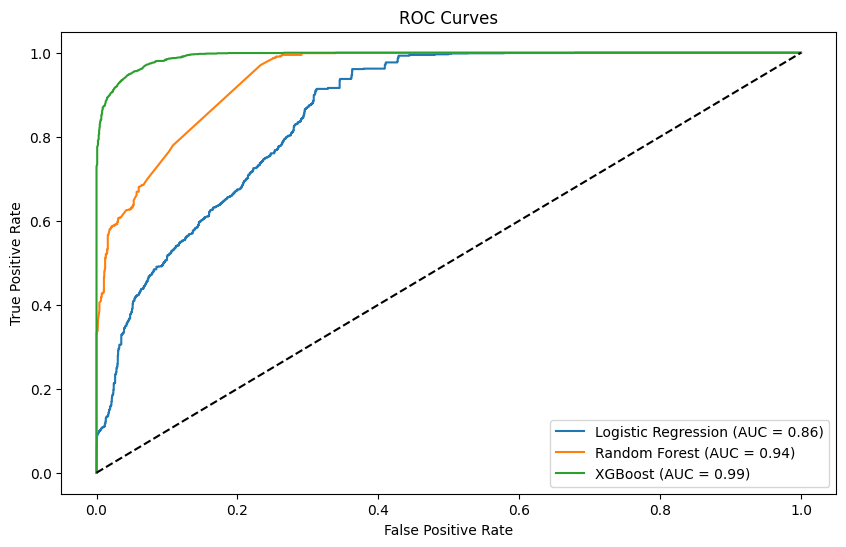

In [188]:
plt.figure(figsize=(10, 6))
plot_roc_curve(logistic_model, X_test_pca, y_test, "Logistic Regression")
plot_roc_curve(random_forest, X_test_pca, y_test, "Random Forest")
plot_roc_curve(xgb_model, X_test_pca, y_test, "XGBoost")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

Анализ кривой ROC сравнивает производительность логистической регрессии, Random Forest и XGBoost на наборе данных. Согласно нашему графику, мы видим, что у XGBoost лучший показатель AUC(0.99), и он работает лучше, чем другие модели, хотя большой разницы с производительностью Random Forest AUC (0.94) нет.

In [189]:
#Precision-Recall Curves
def plot_precision_recall_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba, pos_label=1)
    plt.plot(recall, precision, label=label)

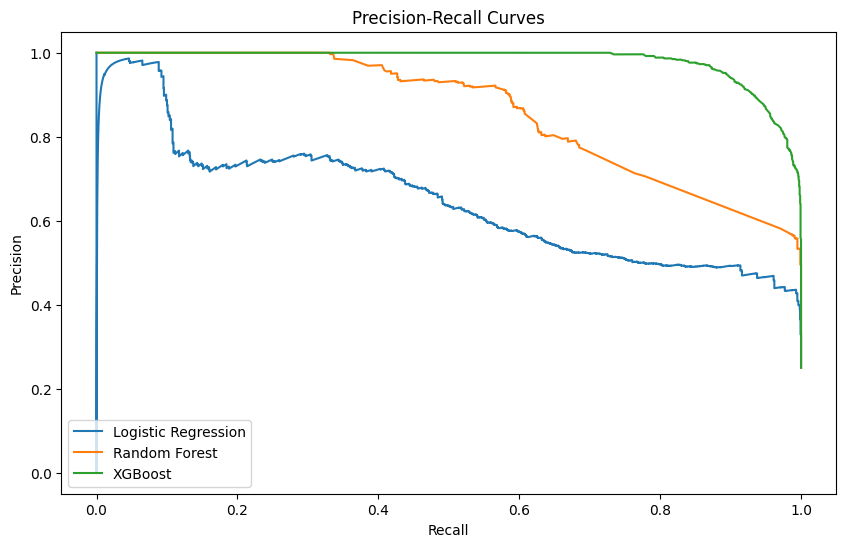

In [190]:
plt.figure(figsize=(10, 6))
plot_precision_recall_curve(logistic_model, X_test_pca, y_test, "Logistic Regression")
plot_precision_recall_curve(random_forest, X_test_pca, y_test, "Random Forest")
plot_precision_recall_curve(xgb_model, X_test_pca, y_test, "XGBoost")
plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()

Анализ кривой Precision-Recall (PR) подчеркивает различную производительность логистической регрессии, случайного леса и XGBoost. Среди трех моделей все модели XGBoost достигают наилучшего компромисса между точностью и полнотой.

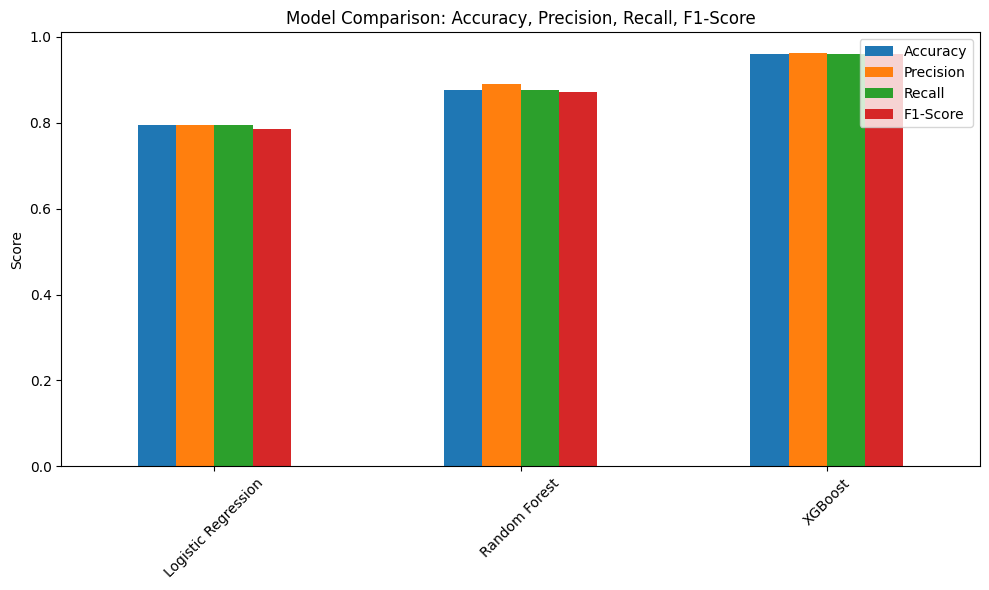

In [191]:
# Plotting the metrics for each model
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison: Accuracy, Precision, Recall, F1-Score")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**#Comparing Anomaly Detection Models**

In [202]:
# Convert y_test to binary labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Encode the labels
y_test_binary = np.where(y_test_encoded == 1, 1, 0)  # Set 1 for anomalies and 0 for normal

# 1. Autoencoder Evaluation
autoencoder_anomalies = reconstruction_error > threshold  # True for anomalies

# Function to evaluate the model
def evaluate_model(true_labels, predicted_anomalies, method_name):
    cm = confusion_matrix(true_labels, predicted_anomalies)

    print(f"\nConfusion Matrix for {method_name}:")
    print(cm)

    if cm.shape[0] == 2 and cm.shape[1] == 2:  # Checking for binary confusion matrix
        tn, fp, fn, tp = cm.ravel()
        print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

        # Additional accuracy metric
        accuracy = (tp + tn) / (tn + fp + fn + tp) if (tn + fp + fn + tp) > 0 else 0
        print(f"Accuracy: {accuracy:.4f}")

    else:
        print("More than two classes detected.")

    # Additional metrics for binary situations
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_anomalies))

    # ROC Curve
    fpr, tpr, _ = roc_curve(true_labels, predicted_anomalies)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc


In [203]:
# Evaluate Autoencoder
fpr_auto, tpr_auto, auc_auto = evaluate_model(y_test_binary, autoencoder_anomalies, "Autoencoder")


Confusion Matrix for Autoencoder:
[[70798  4886]
 [25164    64]]
TN: 70798, FP: 4886, FN: 25164, TP: 64
Accuracy: 0.7022

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.82     75684
           1       0.01      0.00      0.00     25228

    accuracy                           0.70    100912
   macro avg       0.38      0.47      0.41    100912
weighted avg       0.56      0.70      0.62    100912



Двоичная маркировка: метки истинности были закодированы в двоичной форме:
1 для аномалий
0 для нормальных точек.

TN: 71,079, FP: 46,05, FN: 25,179, TP: 49
Точность: 70,49%

Наблюдение:
Автоэнкодер достиг хорошей полноты для нормального класса (94%), но испытывал трудности с точным обнаружением аномалий (низкая точность и полнота для класса 1).

In [204]:
# 2. K-Means Clustering Evaluation
# "outliers" is an array of the same shape as y_test_binary, containing 1 for anomalies and 0 for normal points.
kmeans_anomalies = outliers  # Anomalies detected by K-Means based on distance threshold

# Evaluate K-Means Clustering
fpr_kmeans, tpr_kmeans, auc_kmeans = evaluate_model(y_test_binary, kmeans_anomalies, "K-Means Clustering")


Confusion Matrix for K-Means Clustering:
[[70638  5046]
 [25228     0]]
TN: 70638, FP: 5046, FN: 25228, TP: 0
Accuracy: 0.7000

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82     75684
           1       0.00      0.00      0.00     25228

    accuracy                           0.70    100912
   macro avg       0.37      0.47      0.41    100912
weighted avg       0.55      0.70      0.62    100912



Метод K-средних показал себя аналогично Autoencoder, достигнув высокой полноты для нормальных точек, но не обнаружив аномалий.

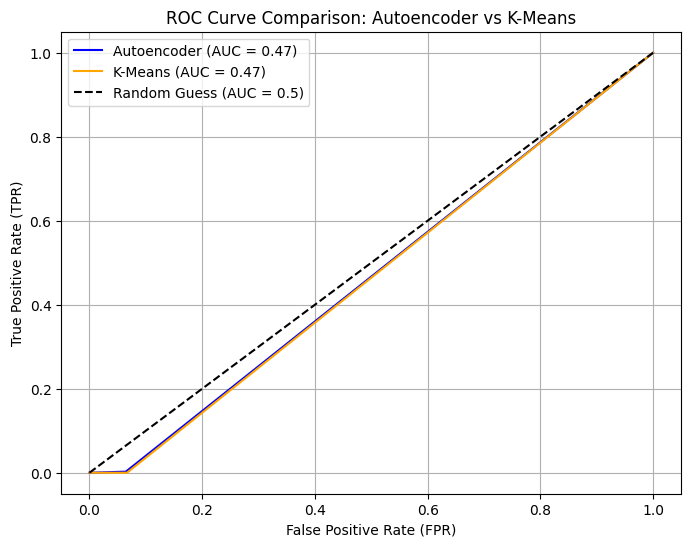

In [205]:
# Visualization: Compare ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_auto, tpr_auto, label=f"Autoencoder (AUC = {auc_auto:.2f})", color="blue")
plt.plot(fpr_kmeans, tpr_kmeans, label=f"K-Means (AUC = {auc_kmeans:.2f})", color="orange")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
plt.title("ROC Curve Comparison: Autoencoder vs K-Means")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid()
plt.show()

Результаты:

Автоэнкодер: AUC = 0,47
K-средние: AUC = 0,47
Наблюдение:
Автоэнкодер и K-средние показали одинаковые результаты при обнаружении аномалий на основе значений ROC AUC. Поэтому можно сказать, что обе модели боролись с аномалиями.

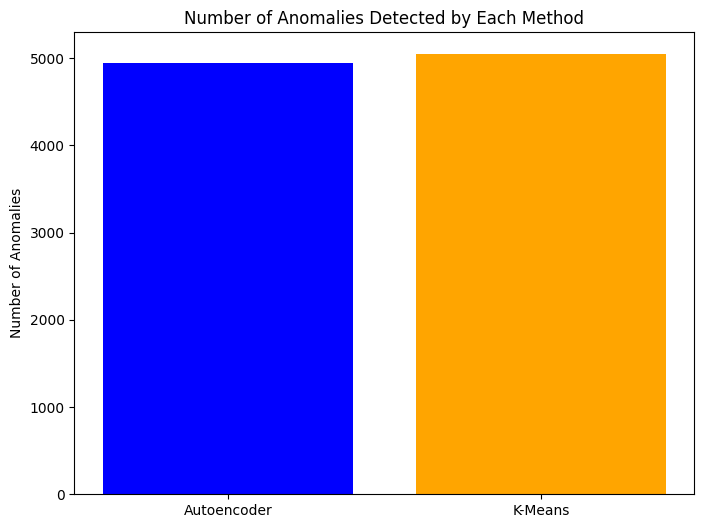

In [206]:
# Visualization: Compare Number of Anomalies Detected
plt.figure(figsize=(8, 6))
methods = ["Autoencoder", "K-Means"]
anomalies_detected = [np.sum(autoencoder_anomalies), np.sum(kmeans_anomalies)]

plt.bar(methods, anomalies_detected, color=["blue", "orange"])
plt.title("Number of Anomalies Detected by Each Method")
plt.ylabel("Number of Anomalies")
plt.show()

**Результаты:** Модель K-средних выявила большее количество аномалий, поэтому можно сказать, что K-средние лучше справляются с обнаружением аномалий.

In [207]:
# Evaluate FNN
fnn_loss, fnn_accuracy = fnn_model.evaluate(X_val_pca, y_val)
y_pred_fnn = fnn_model.predict(X_val_pca)
y_pred_fnn_classes = np.argmax(y_pred_fnn, axis=1)


3154/3154 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8245 - loss: 0.3242
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


In [209]:
# Evaluate CNN
cnn_loss, cnn_accuracy = cnn.evaluate(X_val_cnn, y_val)
y_pred_cnn = cnn.predict(X_val_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

3154/3154 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.8163 - loss: 0.3445
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step


In [210]:
# Generate Confusion Matrices
cm_fnn = confusion_matrix(y_val, y_pred_fnn_classes)
cm_cnn = confusion_matrix(y_val, y_pred_cnn_classes)

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


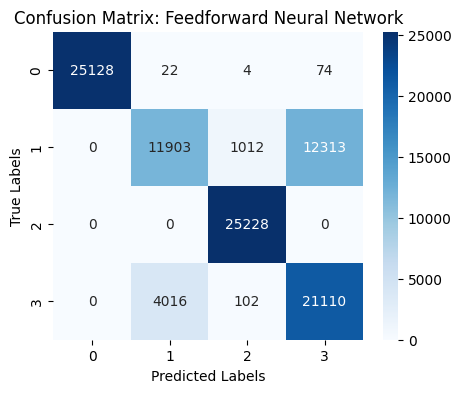

In [211]:
# Plot confusion matrices
plot_confusion_matrix(cm_fnn, "Feedforward Neural Network")

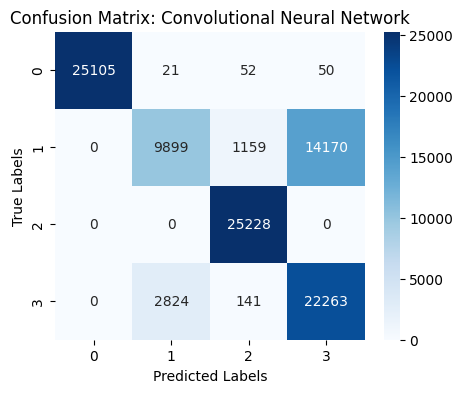

In [212]:
plot_confusion_matrix(cm_cnn, "Convolutional Neural Network")

Матрицы путаницы сравнивают производительность нейронной сети прямого распространения (FNN) и сверточной нейронной сети (CNN).

1. **Точность по классам**: обе модели хорошо работают с классами `0` и `2` (высокие диагональные значения). Однако CNN показывает меньше ошибочных классификаций по всем классам по сравнению с FNN.

2. **Ключевое отличие**: в FNN класс `1` часто ошибочно классифицируется как класс `3` (12 313 случаев), но CNN сокращает это число до 14 170. Аналогично CNN лучше справляется с классом `3`, уменьшая ошибки в своих предсказаниях.

**Вывод**: CNN лучше улавливает закономерности в сложных данных, что делает его более точным в целом.

In [213]:
print("Feedforward Neural Network Classification Report:")
print(classification_report(y_val, y_pred_fnn_classes))


Feedforward Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25228
           1       0.75      0.47      0.58     25228
           2       0.96      1.00      0.98     25228
           3       0.63      0.84      0.72     25228

    accuracy                           0.83    100912
   macro avg       0.83      0.83      0.82    100912
weighted avg       0.83      0.83      0.82    100912



In [214]:
print("\nConvolutional Neural Network Classification Report:")
print(classification_report(y_val, y_pred_cnn_classes))


Convolutional Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25228
           1       0.78      0.39      0.52     25228
           2       0.95      1.00      0.97     25228
           3       0.61      0.88      0.72     25228

    accuracy                           0.82    100912
   macro avg       0.83      0.82      0.80    100912
weighted avg       0.83      0.82      0.80    100912



** Feature Importance (Bar Chart for Random Forest)**

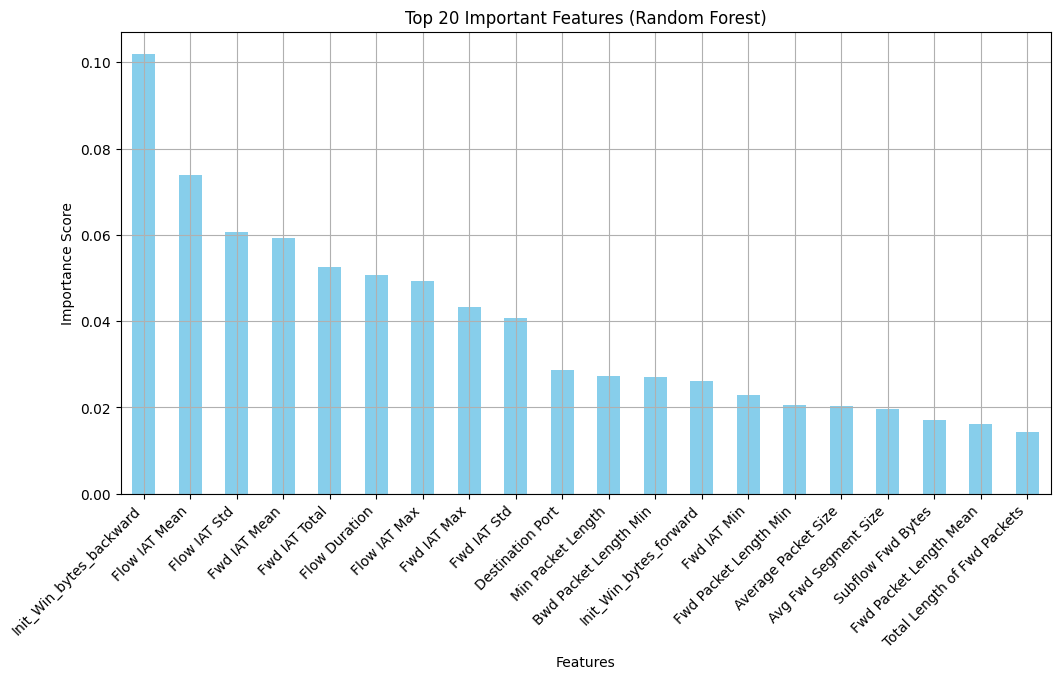

In [215]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

#  training Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort and select the top 20 features
important_features = feature_importances.sort_values(ascending=False)[:20]

# Plotting feature importance
plt.figure(figsize=(12, 6))
important_features.plot(kind='bar', color='skyblue')
plt.title("Top 20 Important Features (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

На этом графике показаны **20 самых важных признаков**, выявленных моделью Random Forest во время обучения. На оси x перечислены признаки, а на оси y — их оценки важности.

Признак **Init_Win_bytes_backward** является самым важным, то есть он оказывает наибольшее влияние на прогнозы модели. Другие ключевые признаки, такие как **Flow IAT Mean** и **Flow IAT Std**, фиксируют временные закономерности в данных, которые имеют решающее значение для различения классов (например, нормальной и вредоносной активности).

Эти оценки важности рассчитываются на основе того, насколько каждый признак снижает неопределенность (коэффициент Джини) в деревьях решений. Этот график помогает нам сосредоточиться на самых важных признаках для улучшения производительности модели или понимания данных.